In [2]:
# Importing Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing Dataset
df = pd.read_csv('IMDB.csv')

In [4]:
# Dataset information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     250 non-null    int64  
 1   Title    250 non-null    object 
 2   Release  250 non-null    int64  
 3   Runtime  250 non-null    object 
 4   Rated    250 non-null    object 
 5   Ratings  250 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 11.8+ KB


,Rank,Release,Ratings
count,250.000000,250.00000,250.000000
mean,125.500000,1988.17200,8.310000
std,72.312977,25.59631,0.232716
min,1.000000,1921.00000,8.000000
25%,63.250000,1971.25000,8.100000
50%,125.500000,1995.00000,8.200000
75%,187.750000,2008.75000,8.400000
max,250.000000,2024.00000,9.300000


In [13]:
# Converting feature dtypes to datetime and timedelta
df['Release'] = pd.to_datetime(df['Release'],format='ISO8601')
df['Runtime'] = pd.to_timedelta(df['Runtime'])
df['Release'] = df['Release'].dt.year

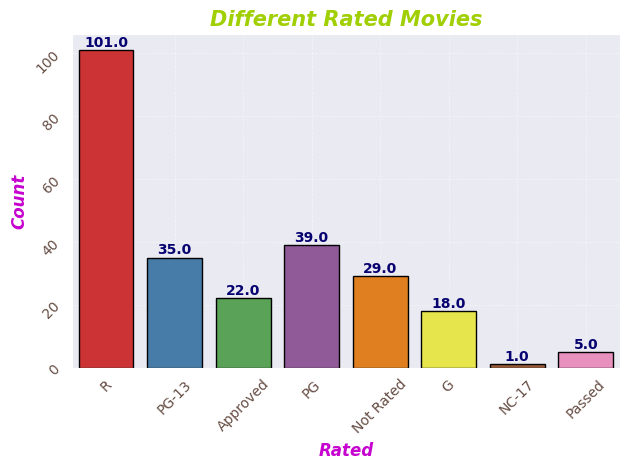

In [21]:
# Countplot
ax = sns.countplot(x='Rated',data=df,hue='Rated',palette='Set1',edgecolor='k')

# Annotation
for i in ax.patches:
    height = i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height+1,height,ha='center',fontweight='bold',color='#060270')

# Styling titles and axis labels
plt.title('Different Rated Movies',fontsize=15,fontweight='bold',fontstyle='oblique',color='#A0CF03')
ax.set_xlabel('Rated',fontsize=12,fontweight='bold',fontstyle='italic',color='#C603CF')
ax.set_ylabel('Count',fontsize=12,fontweight='bold',fontstyle='italic',color='#C603CF')

# Styling tick labels
ax.tick_params(axis='both',rotation=45,labelcolor='#664D44')

# page layout
plt.grid(alpha=0.4,linewidth=0.6,linestyle='--')
plt.tight_layout()
plt.show()

# Countplot
# R-rated movies dominate the dataset with 100+ entries, while NC-17 appears only once, indicating rarity.
# PG-13 and PG categories also have moderate representation.

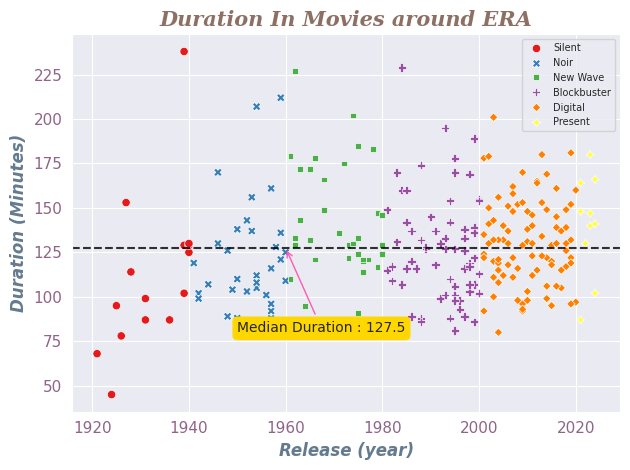

In [30]:
# Bins and labels
b = [1920,1940,1960, 1980,2000,2020,float('inf')]
l = ['Silent','Noir','New Wave','Blockbuster','Digital','Present']

# Feature Engineering
df['ERA'] = pd.cut(df['Release'],bins=b,labels=l)
df['Duration'] = df['Runtime']/pd.Timedelta(minutes=1)

# Page Theme
sns.set_style('darkgrid')

# Scatterplot
ax = sns.scatterplot(x='Release',y='Duration',data=df,hue='ERA',palette='Set1',style='ERA')

# Annotation
med = df['Duration'].median()
plt.axhline(med,linestyle='--',alpha=0.8,color='k',linewidth=1.5)
plt.annotate(f'Median Duration : {med}',xy = (1960,med),xytext = (1950,80),arrowprops=dict(arrowstyle='->',color='#FF5BB3'),
            bbox=dict(boxstyle='round',color='gold'))

# Styling Title , axis label and ticks
plt.title('Duration In Movies around ERA',fontweight='bold',fontstyle='oblique',fontfamily='Serif',color='#8D6F64',fontsize=15)
plt.xlabel('Release (year)',fontweight='bold',fontstyle='italic',color='#647B8F',fontsize=12)
plt.ylabel('Duration (Minutes)',fontweight='bold',fontstyle='italic',color='#647B8F',fontsize=12)
ax.tick_params(axis='both',labelsize=11,labelcolor='#8F6488')

# Page layout and legend
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()

# Scatterplot
# The scatter plot reveals the evolution of movie duration across eras.
# Despite technological and stylistic changes from Silent Era → Noir → New Wave → Blockbuster → Digital → Present.
# the median duration remains around ~127 minutes, indicating that movie length has stayed remarkably consistent over time.

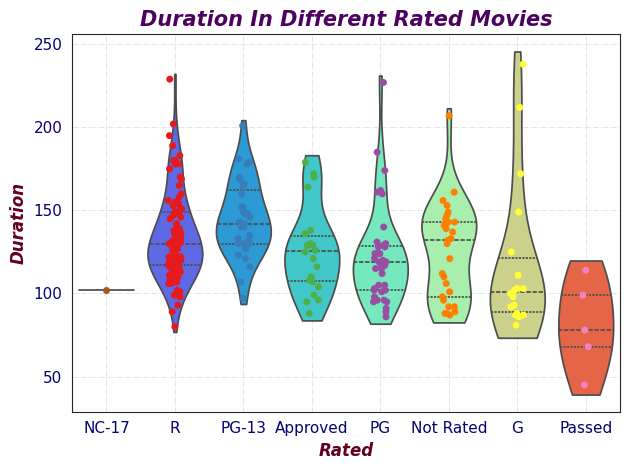

In [37]:
# page theme
sns.set_style('white')
# violinplot + stripplot
o = ['NC-17','R', 'PG-13', 'Approved', 'PG', 'Not Rated', 'G', 'Passed']
sns.violinplot(x='Rated',y='Duration',data=df,inner='quartile',cut=0.3,hue='Rated',palette='rainbow',order=o)
sns.stripplot(x='Rated',y='Duration',data=df,order=o,hue='Rated',palette='Set1')

# Styling title and axis label
plt.title('Duration In Different Rated Movies',fontsize=15,fontweight='bold',fontstyle='oblique',color='#4D0261')
plt.xlabel('Rated',fontsize=12,fontweight='bold',fontstyle='italic',color='#61021E')
plt.ylabel('Duration',fontsize=12,fontweight='bold',fontstyle='italic',color='#61021E')

# Styling ticks labels
plt.tick_params(axis='both',labelcolor='#060270',labelsize=11)

# Page layout
plt.grid(alpha=0.6,linewidth=0.6,linestyle='-.')
plt.tight_layout()
plt.show()

# Violinplot + Stripplot
# R & PG-13 movies show the widest duration range because they cover diverse genres.
# G and PG movies remain consistent around 90–120 minutes due to family audience constraints.
# NC-17 titles are fewer but tend to be slightly longer.
# Older ratings like Approved/Passed show shorter and tighter duration distributions.

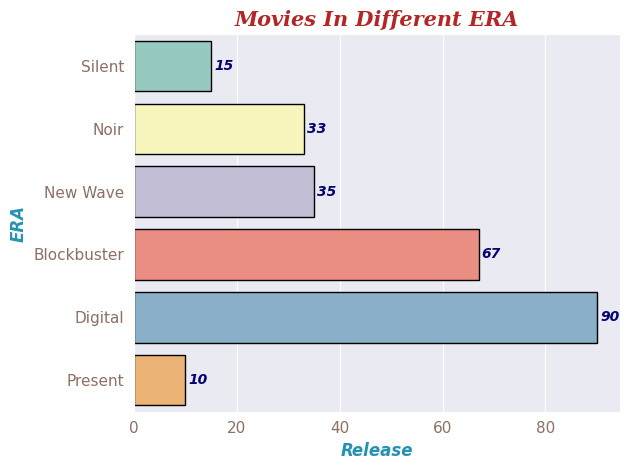

In [45]:
# Page theme
sns.set_style('darkgrid')

# Group by
rate = df.groupby('ERA',observed=False)['Release'].count().reset_index()

# Barplot
ax = sns.barplot(x='Release',y='ERA',data=rate,hue='ERA',palette='Set3',edgecolor='k',orient='h')

# Annotation
for i in ax.patches:
    width = i.get_width()
    plt.text(width+2.5,i.get_y()+i.get_height()/2,round(width),va='center',ha='center',fontweight='bold',fontstyle='oblique',
            color='#060270')

# Styling title, axis-labels and ticks labels
plt.title('Movies In Different ERA',fontweight='bold',fontstyle='oblique',fontsize=15,color='#B32626',fontfamily='Serif')
plt.xlabel('Release',fontweight='bold',fontstyle='oblique',fontsize=12,color='#2692B3')
plt.ylabel('ERA',fontweight='bold',fontstyle='oblique',fontsize=12,color='#2692B3')
plt.tick_params(axis='both',labelcolor='#8D6F64',labelsize=11)

# Page layout
plt.tight_layout()
plt.show()


# Barplot
# Digital & Present Era dominate movie production
# Silent & Noir Eras have the lowest counts
# New Wave era shows a transition phase

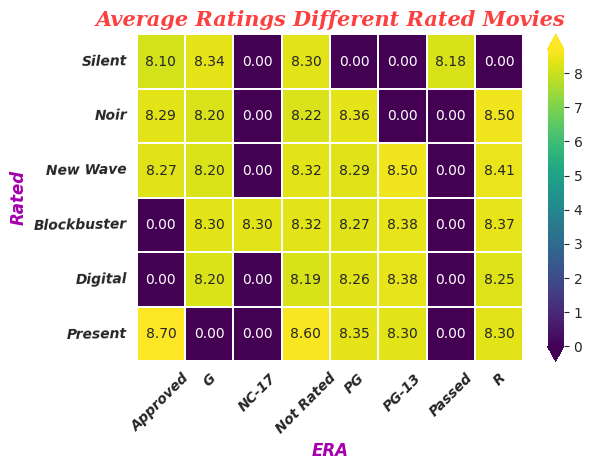

In [48]:
# Pivot table
rates = pd.pivot_table(df,index='ERA',columns='Rated',values='Ratings',aggfunc='mean',observed=False,fill_value=0)

# Heatmap
c = {'shrink':1,'extend':'both'}
sns.heatmap(rates,annot=True,fmt='.02f',cmap='viridis',linewidth=0.1,cbar_kws=c)

# Styling Title,labels and Ticks
plt.title('Average Ratings Different Rated Movies',fontweight='bold',fontstyle='oblique',fontfamily='Serif',color='#FC3F3F',fontsize=15)
plt.xlabel('ERA',fontweight='bold',fontstyle='italic',color='#A400AD',fontsize=12)
plt.ylabel('Rated',fontweight='bold',fontstyle='italic',color='#A400AD',fontsize=12)
plt.xticks(rotation=45,fontweight='bold',fontstyle='oblique')
plt.yticks(rotation=1,fontweight='bold',fontstyle='oblique')

# Page layout
plt.tight_layout()
plt.show()

# Heatmap
# Average IMDb ratings stay around 8 across all eras and rating categories.
# Older eras (Silent, Noir) show slightly higher averages, likely because only critically acclaimed films survive in datasets.
# Modern Digital/Present eras show more variation due to higher movie production and broader rating categories.
# Some categories like NC-17 appear rarely.

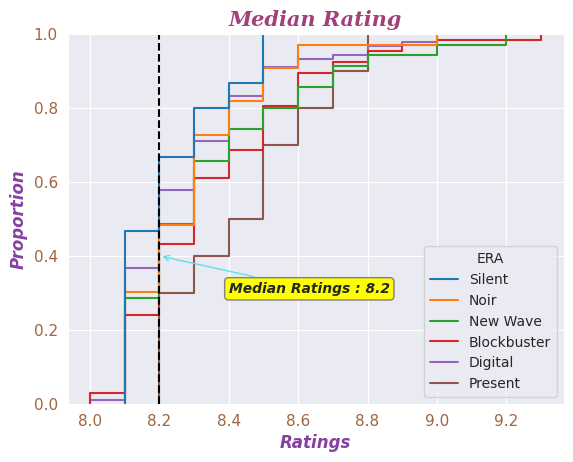

In [51]:
# Page Theme
sns.set_style('darkgrid')

# ECDF plot
sns.ecdfplot(x='Ratings',data=df,hue='ERA')

# Annotation
med = df['Ratings'].median()
plt.axvline(med,linestyle='--',color='k')
plt.annotate(f'Median Ratings : {med}',xy=(med,0.4),xytext=(8.4,0.3),arrowprops=dict(arrowstyle='->',color='#5DE2E7'),
            bbox=dict(facecolor='yellow',boxstyle='round',edgecolor='grey'),fontweight='bold',fontstyle='oblique')

# Styling Title , Labels ,Ticks
plt.title('Median Rating',fontweight='bold',fontstyle='oblique',fontfamily='Serif',color='#A14079',fontsize=15)
plt.xlabel('Ratings',fontweight='bold',fontstyle='oblique',fontsize=12,color='#8640A1')
plt.ylabel('Proportion',fontweight='bold',fontstyle='oblique',fontsize=12,color='#8640A1')

# Page layout
plt.tick_params(axis='both',labelcolor='#A16340',labelsize=11)
plt.show()

# ECDF plot
# ECDF shows that more than 50% of movies in the dataset have a rating above 8.2.
# indicating that dataset is biased toward highly-rated films.
# Older eras (Silent, Noir) rise faster in ECDF curve, meaning they contain more consistently high-rated movies,
# while modern eras show more spread.

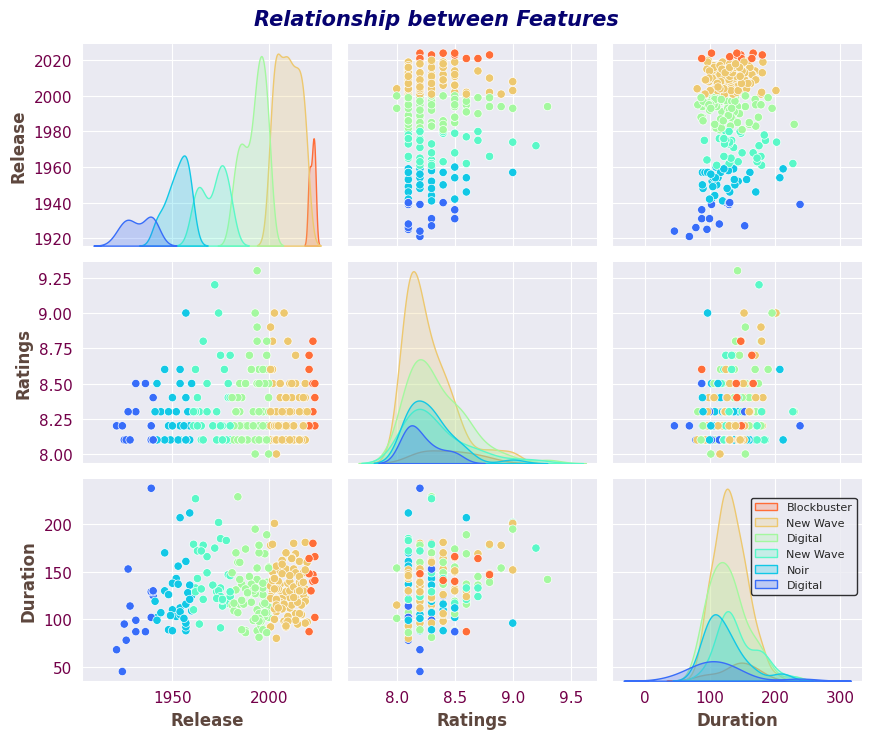

In [54]:
# Page theme
sns.set_style('darkgrid')

# Pair plot
ax = sns.pairplot(df,vars=['Release','Ratings','Duration'],hue='ERA',palette='rainbow',kind='scatter',diag_kind='kde')

# Styling Title , labels ,ticks
plt.suptitle('Relationship between Features',fontsize=15,color='#060270',fontstyle='oblique',fontweight='bold')
ax._legend.remove()
for i in ax.axes.flat:
    i.set_xlabel(i.get_xlabel(),color='#5D463D',fontsize=12,fontweight='bold')
    i.set_ylabel(i.get_ylabel(),color='#5D463D',fontsize=12,fontweight='bold')
    i.tick_params(axis='both',labelcolor='#730049',labelsize=11)

# page layout
plt.legend(df['ERA'],loc='lower right',fontsize=8,bbox_to_anchor=(1,0.4),edgecolor='k')
plt.tight_layout()
plt.show()

# Pairplot
# pairplot reveals positive trend between Release year and Duration — modern movies tend to longer on average compared to early-era films.
# Ratings remain largely independent of Release year, suggesting that older and newer films can both achieve high ratings.
# ERA groups form clear clusters, especially in Release vs Duration, showing distinct evolution in filmmaking styles across eras.